# ACC.gov Job Opportunities Analysis

This notebook analyzes and visualizes the job opportunities data scraped from ACC.gov.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
from urllib.parse import urlparse

plt.style.use('ggplot')
sns.set_theme(style="whitegrid")

plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

## Load and Prepare Data

In [2]:
df = pd.read_csv('acc_gov_opportunities.csv')

df['Hourly Pay'] = df['Hourly Pay'].str.replace('$', '').astype(float)
df['Focus Areas'] = df['Focus Areas'].fillna('Not specified')
df['Work Environments'] = df['Work Environments'].fillna('Not specified')

df['Apply Domain'] = df['Apply URL'].apply(lambda x: urlparse(x).netloc if pd.notnull(x) else 'N/A')
df['Apply Domain'] = df['Apply Domain'].apply(lambda x: '.'.join(x.split('.')[-3:]) if x != 'N/A' else x)

print(f"Total number of job opportunities: {len(df)}")
df.head()

Total number of job opportunities: 189


,Title,Project,Location,Hourly Pay,Term Length,Apply By,Learn More URL,Focus Areas,Work Environments,Apply URL,Latitude,Longitude,Apply Domain
0,Urban and Community Forestry Fall Crew Leader,Urban and Community Forestry - Fall,"Eugene, Oregon",15.0,9/23/2024-12/13/2024,9/23/24,https://www.acc.gov/opportunities/urban-and-co...,"Forestry, Urban agriculture, Tree planting and...","Urban, Outdoor",https://nwyouthcorps.workbrightats.com/jobs/10...,44.050505,-123.095051,nwyouthcorps.workbrightats.com
1,UCF Fall Young Adult Crew Member,Urban and Community Forestry (UCF) - Fall,"Eugene, Oregon",15.0,9/23/2024-12/13/2024,9/23/24,https://www.acc.gov/opportunities/ucf-fall-you...,"Forestry, Urban agriculture, Tree planting and...","Urban, Outdoor",https://nwyouthcorps.workbrightats.com/jobs/10...,44.050505,-123.095051,nwyouthcorps.workbrightats.com
2,UCF Fall Young Adult Crew Member,UCF Fall Young Adult Crew Member,"Tacoma, Washington",15.0,9/23/2024-12/13/2024,9/23/24,https://www.acc.gov/opportunities/ucf-fall-you...,"Forestry, Urban agriculture, Tree planting and...","Urban, Outdoor",https://nwyouthcorps.workbrightats.com/jobs/10...,47.245501,-122.438329,nwyouthcorps.workbrightats.com
3,UCF Young Adult Crew Member,UCF Young Adult Crew Member,"Nampa, Idaho",15.0,9/23/2024-12/13/2024,9/23/24,https://www.acc.gov/opportunities/ucf-young-ad...,"Forestry, Urban agriculture, Tree planting and...","Urban, Outdoor",https://nwyouthcorps.workbrightats.com/jobs/10...,43.573736,-116.559631,nwyouthcorps.workbrightats.com
4,Community Wildfire Protection Crew Member,Community Wildfire Protection,"Eugene, Oregon",15.0,9/23/2024-12/6/2024,9/23/24,https://www.acc.gov/opportunities/community-wi...,Wildfire prevention and fuels reduction,"Rural, Urban, Outdoor",https://nwyouthcorps.workbrightats.com/jobs/10...,44.050505,-123.095051,nwyouthcorps.workbrightats.com


## Map of Job Locations

In [3]:
m = folium.Map(location=[39.8283, -98.5795], zoom_start=4)

marker_cluster = MarkerCluster().add_to(m)

for idx, row in df.iterrows():
    if pd.notnull(row['Latitude']) and pd.notnull(row['Longitude']):
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=f"<strong>{row['Title']}</strong><br>Location: {row['Location']}<br>Hourly Pay: ${row['Hourly Pay']:.2f}<br><a href='{row['Apply URL']}' target='_blank'>Apply</a>"
        ).add_to(marker_cluster)

m

## Distribution of Hourly Wages

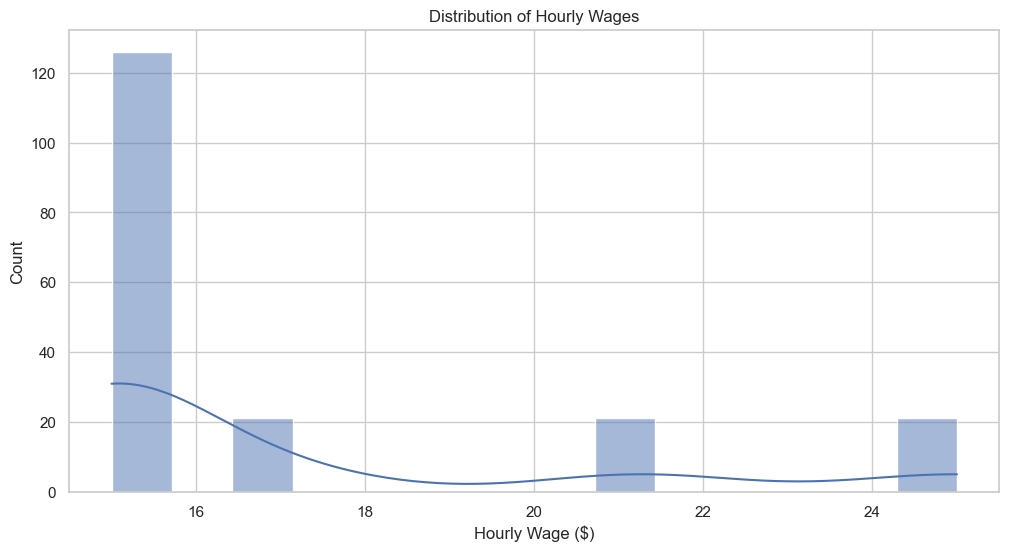

In [4]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Hourly Pay'], kde=True)
plt.title('Distribution of Hourly Wages')
plt.xlabel('Hourly Wage ($)')
plt.ylabel('Count')
plt.show()

## Top 10 Locations

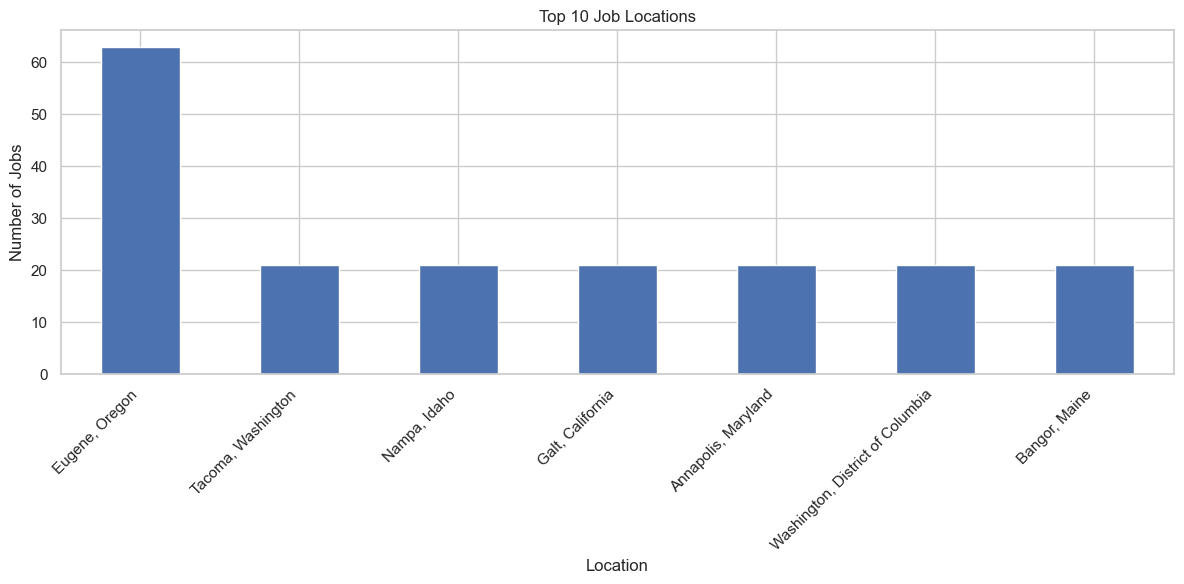

In [5]:
plt.figure(figsize=(12, 6))
df['Location'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Job Locations')
plt.xlabel('Location')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Top Focus Areas

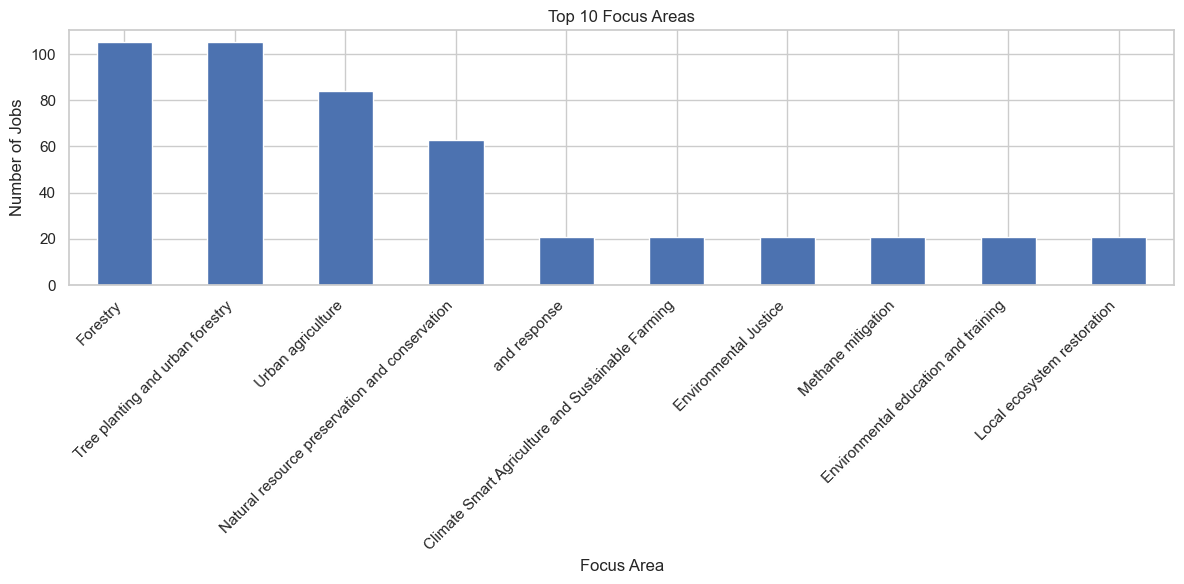

In [6]:
focus_areas = df['Focus Areas'].str.split(', ', expand=True).stack().value_counts()

plt.figure(figsize=(12, 6))
focus_areas.head(10).plot(kind='bar')
plt.title('Top 10 Focus Areas')
plt.xlabel('Focus Area')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Work Environments

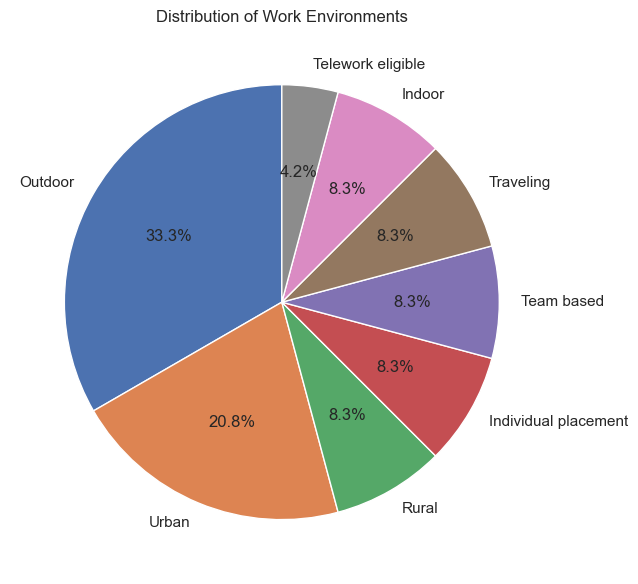

In [7]:
work_envs = df['Work Environments'].str.split(', ', expand=True).stack().value_counts()

plt.figure(figsize=(10, 6))
work_envs.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Work Environments')
plt.ylabel('') 
plt.tight_layout()
plt.show()

## Distribution of Apply URL Domains

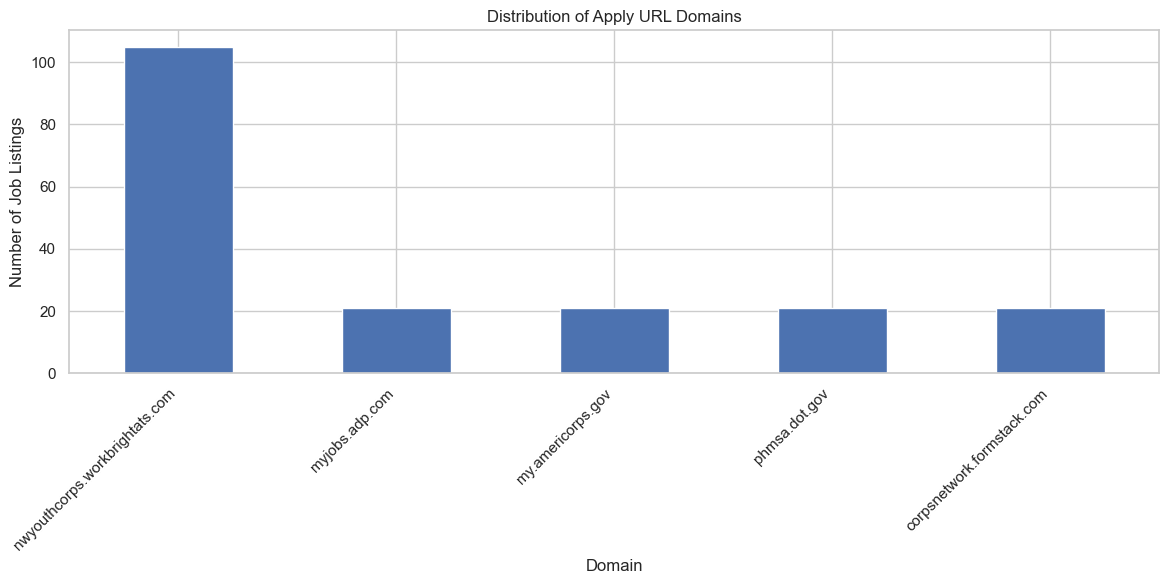

Domain distribution:
Apply Domain
nwyouthcorps.workbrightats.com    105
myjobs.adp.com                     21
my.americorps.gov                  21
phmsa.dot.gov                      21
corpsnetwork.formstack.com         21
Name: count, dtype: int64


In [8]:
domain_counts = df['Apply Domain'].value_counts()

plt.figure(figsize=(12, 6))
domain_counts.plot(kind='bar')
plt.title('Distribution of Apply URL Domains')
plt.xlabel('Domain')
plt.ylabel('Number of Job Listings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Domain distribution:")
print(domain_counts)